## 1. Introdução

### 1.1 Apresentação do projeto

Este projeto é um *case* fictício com objetivo de realizar um projeto de *Insights* de acordo com uma boa análise exploratória dos dados propostos.
    Este projeto cobrir os 5 passos para resolução de problemas, sendo eles:
    
    1. A Questão de Negócio
    2. O Entendimento do Negócio
    3. A Coleta de Dados
    4. A Limpeza de Dados
    5. A Exploração de Dados

Meu objetivo é ao longo do tempo seguir aprimorando a análise deste projeto com novas habilidades e ferramentas e apurando as conclusões tomadas na primeira análise feita.

### 1.2 Contexto do problema

Uma loja de e-commerce de abrangência mundial precisa de uma análise em seus dados para tomar decisões estratégicas com finalidade de expandir seus negócios ainda mais e quer informações que possam ajudar nesta tomada de decisão.
Para este case foram propostas 5 questões a serem respondidas com a AED. As 5 questões são:

    1 - Qual a país que mais compra em cada Região de venda?
    2 - O frete influencia no volume de compras?
    3 - 3 - Qual a região de mercado que mais compra?
    4 - Qual epoca do ano vende mais?
    5 - Ranking dos melhores clientes.
    
### 1.3 Dados e Ferramentas de Análise

Para este projeto serão utilizados os dados de venda de uma superstore durante 4 anos. Estes dados foram disponibilizados na plataforma [kaggle](https://www.kaggle.com/) como forma de incentivar e disponibilizar dados para estudos e novas discussões.
O link para a base de dados utilizada neste case está disponível [aqui](https://www.kaggle.com/jr2ngb/superstore-data).

Também irei escrever todos os passos utilizados no pipeline de forma clara para caso alguém queira seguir os passos deste case como forma de estudo possa ter pleno entendimento do que está sendo feito.


A análise desses dados foi feita utilizando o Juyter Notebook e Python 3. Também foram utlizadas as seguintes bibliotecas:

- [Numpy](https://numpy.org/)

- [Pandas](https://pandas.pydata.org/)

- [Matplotlib](https://matplotlib.org/)

- [IpyWidgets](https://ipywidgets.readthedocs.io/en/latest/)

- [Seaborn](https://seaborn.pydata.org/)


## 2. Limpeza de dados e análise preliminar

### 2.1 Importando bibliotecas

In [2]:
#importando as bibliotecas que serão utilizadas neste case.
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import ipywidgets as widgets

#definindo o número máximo de colunas e linhas mostradas na tela.
pd.options.display.max_columns = None
pd.options.display.max_rows = 500

### 2.2 Importando o Data Frame e primeiras verificações

In [4]:
#importando os dados de uma planilha csv e definindo como a variável df
df = pd.read_csv("superstore_dataset2011-2015.csv")

#visualizando as 15 primeiras linhas do df.
df.head(15)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Postal Code,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,NaN,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.00,106.1400,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.10,36.0360,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,NaN,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.00,29.6400,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,NaN,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.50,-26.0550,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.10,37.7700,4.70,Medium
5,22254,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,NaN,APAC,Oceania,OFF-PA-10001968,Office Supplies,Paper,"Eaton Computer Printout Paper, 8.5 x 11",55.242,2,0.10,15.3420,1.80,Medium
6,21613,IN-2011-30733,1/2/2011,3/2/2011,Second Class,PO-18865,Patrick O'Donnell,Consumer,Dhaka,Dhaka,Bangladesh,NaN,APAC,Central Asia,TEC-CO-10002316,Technology,Copiers,"Brother Personal Copier, Laser",285.780,2,0.00,71.4000,57.30,Critical
7,34662,CA-2011-115161,1/2/2011,3/2/2011,First Class,LC-17050,Liz Carlisle,Consumer,Mission Viejo,California,United States,92691.0,US,West,FUR-BO-10003966,Furniture,Bookcases,"Sauder Facets Collection Library, Sky Alder Fi...",290.666,2,0.15,3.4196,54.64,High
8,44508,AO-2011-1390,1/2/2011,4/2/2011,Second Class,DK-3150,David Kendrick,Corporate,Luanda,Luanda,Angola,NaN,Africa,Africa,OFF-FEL-10001541,Office Supplies,Storage,"Fellowes Lockers, Wire Frame",206.400,1,0.00,92.8800,53.08,Critical
9,23688,ID-2011-56493,1/2/2011,3/2/2011,Second Class,SP-20650,Stephanie Phelps,Corporate,Yingcheng,Hubei,China,NaN,APAC,North Asia,OFF-ST-10002161,Office Supplies,Storage,"Tenex Trays, Single Width",162.720,3,0.00,68.3100,44.36,Critical


In [8]:
# defininindo o número de linhas e colunas do df
print("Quantidade de Linhas no DF: {}".format(df.shape[0]))
print("Quantidade de Colunas no DF: {}".format(df.shape[1]))

Quantidade de Linhas no DF: 51290
Quantidade de Colunas no DF: 24


In [11]:
#verificando quais colunas existem no df
list(df.columns)

['Row ID',
 'Order ID',
 'Order Date',
 'Ship Date',
 'Ship Mode',
 'Customer ID',
 'Customer Name',
 'Segment',
 'City',
 'State',
 'Country',
 'Postal Code',
 'Market',
 'Region',
 'Product ID',
 'Category',
 'Sub-Category',
 'Product Name',
 'Sales',
 'Quantity',
 'Discount',
 'Profit',
 'Shipping Cost',
 'Order Priority']

### 2.3 Limpeza dos dados - Parte 1

In [12]:
#verificando se há valores duplicados na coluna order ID
df["Order ID"].duplicated().value_counts()

True     26255
False    25035
Name: Order ID, dtype: int64

In [15]:
#verificando os valores da coluna Ship Mode
df["Ship Mode"].value_counts()

Standard Class    30775
Second Class      10309
First Class        7505
Same Day           2701
Name: Ship Mode, dtype: int64

In [18]:
#verificando os valores da coluna Segment
df["Segment"].value_counts()

Consumer       26518
Corporate      15429
Home Office     9343
Name: Segment, dtype: int64

In [20]:
#verificando os valores da coluna Market
df["Market"].value_counts()

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64

In [21]:
#verificando os valores da coluna Region
df["Region"].value_counts()

Central           11117
South              6645
EMEA               5029
North              4785
Africa             4587
Oceania            3487
West               3203
Southeast Asia     3129
East               2848
North Asia         2338
Central Asia       2048
Caribbean          1690
Canada              384
Name: Region, dtype: int64

In [22]:
#verificando os valores da coluna Category
df["Category"].value_counts()

Office Supplies    31273
Technology         10141
Furniture           9876
Name: Category, dtype: int64

In [23]:
#verificando os valores da coluna Sub - Category
df["Sub-Category"].value_counts()

Binders        6152
Storage        5059
Art            4883
Paper          3538
Chairs         3434
Phones         3357
Furnishings    3170
Accessories    3075
Labels         2606
Envelopes      2435
Supplies       2425
Fasteners      2420
Bookcases      2411
Copiers        2223
Appliances     1755
Machines       1486
Tables          861
Name: Sub-Category, dtype: int64

In [24]:
#verificando se há valores duplicados na coluna Product Name
df["Product Name"].duplicated().value_counts()

True     47502
False     3788
Name: Product Name, dtype: int64

### 2.4 Primeira análise dos dados

#### Identificando as colunas e seus significados

**Row ID** - Coluna com id das linhas no dataframe (não se repete)

**Order ID** - ID dos pedidos (se repete)

**Order Date**- Data do pedido

**Ship Date** - Data do envio

**Ship Mode** - Tipo de envio podendo ser: (Standard class, Second Class, First Class, Same Day)

**Customer ID** - ID do cliente

**Segment** - segmento do cliente (consumer,corporate e home office)

**City** - Cidade do cliente

**State** - Estado do cliente

**Country** - País do cliente

**Postal Code** - Código postal

**Market** - Divisão geográfica internacional de mercado ( APAC - Ásia-Pacífico, LATAM - América Latina e Caribe, EU - Europa geralmente central, US - Estados unidos, EMEA - Europa, Oriente Médio e África, Africa - Africa, Canada - Canadá)
Region - Região geofráfica específica (Central,South,EMEA,North,Africa,Oceania,West,Southeast Asia,East,North Asia,Central Asia,Caribbean, Canada.)

**Product ID** - ID do produto

**Category** - Categoria do produto ( Office supplies, Technology, Furniture)

**Sub-Category** - Sub-Categoria do produto (Binders,Storage,Art,Paper,Chairs,Phones,Furnishings,Accessories,Labels,Envelopes,Supplies,Fasteners,Bookcases,Copiers,Appliances,Machines,Taples.)

**Product Name** - Nome do produto

**Sales** - Valor total da venda dos produtos em dolares (valor unitário x quantidade)
 
**Quantity** - Quantidade do produto no pedido 

**Discount** - Desconto aplicado no pedido

**Profit** - Lucro sobre o pedido

**Shipping Cost** - Valor de Frete

**Order Priority** - Prioridade de entrega do pedido

### 2.5 Limpeza dos dados - Parte 2
#### Verificando dados nulos e zerados

In [25]:
#definindo a variável columns como uma lista das colunas de df
columns = list(df.columns)
#verificando se há valores nulos em cada coluna do df
for name in columns:
    nuli = df[name].isnull().value_counts()
    print(nuli)

False    51290
Name: Row ID, dtype: int64
False    51290
Name: Order ID, dtype: int64
False    51290
Name: Order Date, dtype: int64
False    51290
Name: Ship Date, dtype: int64
False    51290
Name: Ship Mode, dtype: int64
False    51290
Name: Customer ID, dtype: int64
False    51290
Name: Customer Name, dtype: int64
False    51290
Name: Segment, dtype: int64
False    51290
Name: City, dtype: int64
False    51290
Name: State, dtype: int64
False    51290
Name: Country, dtype: int64
True     41296
False     9994
Name: Postal Code, dtype: int64
False    51290
Name: Market, dtype: int64
False    51290
Name: Region, dtype: int64
False    51290
Name: Product ID, dtype: int64
False    51290
Name: Category, dtype: int64
False    51290
Name: Sub-Category, dtype: int64
False    51290
Name: Product Name, dtype: int64
False    51290
Name: Sales, dtype: int64
False    51290
Name: Quantity, dtype: int64
False    51290
Name: Discount, dtype: int64
False    51290
Name: Profit, dtype: int64
False    512

É possível verificar que há valores nulos apeans na coluna **Postal Code**

Para esta análise a coluna Postal code não será necessária então para solucionar a questão dos valores nulos esta coluna será retirada.

In [26]:
#retirando a coluna postal code
df = df.drop(columns = ["Postal Code"])

In [27]:
#verificando se há valores zerados nos preços de venda
df.loc[df["Sales"] == 0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority


In [29]:
#verificando se há valores zerados nas quantidades de pedido
df.loc[df["Quantity"] == 0]

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority


### 3. Modelagem dos dados

In [31]:
#verificando os formatos de cada coluna
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Customer Name   51290 non-null  object 
 7   Segment         51290 non-null  object 
 8   City            51290 non-null  object 
 9   State           51290 non-null  object 
 10  Country         51290 non-null  object 
 11  Market          51290 non-null  object 
 12  Region          51290 non-null  object 
 13  Product ID      51290 non-null  object 
 14  Category        51290 non-null  object 
 15  Sub-Category    51290 non-null  object 
 16  Product Name    51290 non-null  object 
 17  Sales           51290 non-null 

In [36]:
df.head(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium


In [37]:
df.tail(5)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
51285,32593,CA-2014-115427,31-12-2014,4/1/2015,Standard Class,EB-13975,Erica Bern,Corporate,Fairfield,California,United States,US,West,OFF-BI-10002103,Office Supplies,Binders,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",13.904,2,0.2,4.5188,0.89,Medium
51286,47594,MO-2014-2560,31-12-2014,5/1/2015,Standard Class,LP-7095,Liz Preis,Consumer,Agadir,Souss-Massa-Dra�,Morocco,Africa,Africa,OFF-WIL-10001069,Office Supplies,Binders,"Wilson Jones Hole Reinforcements, Clear",3.990,1,0.0,0.4200,0.49,Medium
51287,8857,MX-2014-110527,31-12-2014,2/1/2015,Second Class,CM-12190,Charlotte Melton,Consumer,Managua,Managua,Nicaragua,LATAM,Central,OFF-LA-10004182,Office Supplies,Labels,"Hon Color Coded Labels, 5000 Label Set",26.400,3,0.0,12.3600,0.35,Medium
51288,6852,MX-2014-114783,31-12-2014,6/1/2015,Standard Class,TD-20995,Tamara Dahlen,Consumer,Ju�rez,Chihuahua,Mexico,LATAM,North,OFF-LA-10000413,Office Supplies,Labels,"Hon Legal Exhibit Labels, Alphabetical",7.120,1,0.0,0.5600,0.20,Medium
51289,36388,CA-2014-156720,31-12-2014,4/1/2015,Standard Class,JM-15580,Jill Matthias,Consumer,Loveland,Colorado,United States,US,West,OFF-FA-10003472,Office Supplies,Fasteners,Bagged Rubber Bands,3.024,3,0.2,-0.6048,0.17,Medium


A coluna Order date está utilizando dois formatos de data diferentes. 

### 3.1 Alterando o formato das datas

In [38]:
# as datas em order date tem dois formatos xx/xx/xx e xx-xx-xx vamos alterar tudo para xx/xx/xx

df["Order Date"] = df["Order Date"].str.replace("-","/")
df["Order Date"].tail()

51285    31/12/2014
51286    31/12/2014
51287    31/12/2014
51288    31/12/2014
51289    31/12/2014
Name: Order Date, dtype: object

In [39]:
# printar 10 linhas randomicas para verificarmos os valores alterados.
df.sample(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority
24071,44816,RS-2012-7550,15/06/2012,17-06-2012,Second Class,MC-7275,Marc Crier,Consumer,Sterlitamak,Bashkortostan,Russia,EMEA,EMEA,FUR-RUB-10004285,Furniture,Furnishings,"Rubbermaid Clock, Duo Pack",50.2200,1,0.00,8.0100,8.70,High
6562,17290,ES-2012-4818797,9/8/2012,13-08-2012,Standard Class,DS-13030,Darrin Sayre,Home Office,La Teste-de-Buch,Aquitaine,France,EU,Central,TEC-AC-10003904,Technology,Accessories,"SanDisk Keyboard, USB",245.0700,3,0.00,19.5300,36.99,High
31407,35257,CA-2012-113901,19/10/2012,24-10-2012,Standard Class,NH-18610,Nicole Hansen,Corporate,Detroit,Michigan,United States,US,Central,OFF-BI-10001249,Office Supplies,Binders,Avery Heavy-Duty EZD View Binder with Locking ...,38.2800,6,0.00,17.6088,1.90,Medium
49705,25730,ID-2011-14360,30/09/2011,1/10/2011,First Class,GH-14665,Greg Hansen,Consumer,Manado,Sulawesi Utara,Indonesia,APAC,Southeast Asia,FUR-FU-10000422,Furniture,Furnishings,"Deflect-O Photo Frame, Black",37.8870,1,0.27,-9.3630,2.35,Medium
23355,25011,ID-2014-55989,14/11/2014,18-11-2014,Second Class,DB-13360,Dennis Bolton,Home Office,Bangkok,Bangkok,Thailand,APAC,Southeast Asia,OFF-SU-10003343,Office Supplies,Supplies,"Fiskars Scissors, Serrated",21.0516,2,0.47,-3.6084,2.72,Medium
45803,31526,US-2012-145436,28/02/2012,4/3/2012,Standard Class,VD-21670,Valerie Dominguez,Consumer,Columbia,Tennessee,United States,US,South,FUR-CH-10004477,Furniture,Chairs,"Global Push Button Manager's Chair, Indigo",389.6960,8,0.20,43.8408,28.62,Medium
22883,2128,MX-2011-132598,14/09/2011,19-09-2011,Standard Class,HH-15010,Hilary Holden,Corporate,Managua,Managua,Nicaragua,LATAM,Central,OFF-LA-10002354,Office Supplies,Labels,"Novimex Color Coded Labels, 5000 Label Set",59.7800,7,0.00,12.4600,4.60,Medium
13777,47840,MO-2014-9640,2/5/2014,6/5/2014,Standard Class,LC-6930,Linda Cazamias,Corporate,Taza,Taza-Al Hoceima-Taounate,Morocco,Africa,Africa,OFF-BIC-10000718,Office Supplies,Art,"BIC Pencil Sharpener, Fluorescent",30.2700,1,0.00,10.2900,5.15,High
12826,36966,CA-2013-142405,12/6/2013,16-06-2013,Standard Class,SE-20110,Sanjit Engle,Consumer,Seattle,Washington,United States,US,West,TEC-AC-10003095,Technology,Accessories,Logitech G35 7.1-Channel Surround Sound Headset,389.9700,3,0.00,132.5898,22.10,Medium
32090,46485,RS-2014-3230,20/02/2014,22-02-2014,First Class,JP-6135,Julie Prescott,Home Office,Chelyabinsk,Chelyabinsk,Russia,EMEA,EMEA,OFF-TEN-10004210,Office Supplies,Storage,"Tenex Trays, Wire Frame",213.1200,4,0.00,106.5600,16.53,High


É possível ver neste sample que a coluna ship date sofre do mesmo problema.

In [41]:
# as datas em ship date tem dois formatos xx/xx/xx e xx-xx-xx vamos alterar tudo para xx/xx/xx
df["Ship Date"] = df["Ship Date"].str.replace("-","/")
#verificando a linha 31407
print (df.loc[[31407]])

       Row ID        Order ID  Order Date   Ship Date       Ship Mode  \
31407   35257  CA-2012-113901  19/10/2012  24/10/2012  Standard Class   

      Customer ID  Customer Name    Segment     City     State        Country  \
31407    NH-18610  Nicole Hansen  Corporate  Detroit  Michigan  United States   

      Market   Region       Product ID         Category Sub-Category  \
31407     US  Central  OFF-BI-10001249  Office Supplies      Binders   

                                            Product Name  Sales  Quantity  \
31407  Avery Heavy-Duty EZD View Binder with Locking ...  38.28         6   

       Discount   Profit  Shipping Cost Order Priority  
31407       0.0  17.6088            1.9         Medium  


### 3.3 Criando coluna Preço unitário

In [42]:
#criando função para calcular o preço unitário
def unit_price(sales,quantity,discount):
    
    unit_pryce = (sales/(1-discount))/quantity
    
    return(unit_pryce)
#testando
unit_price(39.672,4,0.4)

16.53

Funcionando :)

In [43]:
#definindo o valor unitario de cada produto  
df["Unit_Price_Product"] = unit_price(df["Sales"],df["Quantity"],df["Discount"])

df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit_Price_Product
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.15
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,44.58
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,16.53
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,29.91
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,25.26


In [45]:
# Arredondando o valor unitario para duas casas decimais
df["Unit_Price_Product"] = df["Unit_Price_Product"].round(2)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit_Price_Product
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.15
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,44.58
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,16.53
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,29.91
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,25.26


### 3.4 Separando as datas em colunas

In [46]:
#separando a coluna order date em colunas de dia mes e ano
df[["Order_day","Order_month","Order_Year"]] = df["Order Date"].str.split("/",3,expand = True)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit_Price_Product,Order_day,Order_month,Order_Year
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.15,1,1,2011
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,44.58,1,1,2011
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,16.53,1,1,2011
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,29.91,1,1,2011
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,25.26,1,1,2011


In [47]:
#separando a coluna ship date em colunas de dia mes e ano
df[["Ship_day","Ship_month","Ship_Year"]] = df["Ship Date"].str.split("/",3,expand = True)
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit_Price_Product,Order_day,Order_month,Order_Year,Ship_day,Ship_month,Ship_Year
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.15,1,1,2011,6,1,2011
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,44.58,1,1,2011,8,1,2011
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,16.53,1,1,2011,5,1,2011
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,29.91,1,1,2011,5,1,2011
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,25.26,1,1,2011,8,1,2011


In [49]:
#alterando os valores da coluna de 01 para 1
df["Order_month"] = df["Order_month"].replace(["01","02","03","04","05","06","07","08","09"],[1,2,3,4,5,6,7,8,9])
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Shipping Cost,Order Priority,Unit_Price_Product,Order_day,Order_month,Order_Year,Ship_day,Ship_month,Ship_Year
0,42433,AG-2011-2040,1/1/2011,6/1/2011,Standard Class,TB-11280,Toby Braunhardt,Consumer,Constantine,Constantine,Algeria,Africa,Africa,OFF-TEN-10000025,Office Supplies,Storage,"Tenex Lockers, Blue",408.300,2,0.0,106.140,35.46,Medium,204.15,1,1,2011,6,1,2011
1,22253,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,OFF-SU-10000618,Office Supplies,Supplies,"Acme Trimmer, High Speed",120.366,3,0.1,36.036,9.72,Medium,44.58,1,1,2011,8,1,2011
2,48883,HU-2011-1220,1/1/2011,5/1/2011,Second Class,AT-735,Annie Thurman,Consumer,Budapest,Budapest,Hungary,EMEA,EMEA,OFF-TEN-10001585,Office Supplies,Storage,"Tenex Box, Single Width",66.120,4,0.0,29.640,8.17,High,16.53,1,1,2011,5,1,2011
3,11731,IT-2011-3647632,1/1/2011,5/1/2011,Second Class,EM-14140,Eugene Moren,Home Office,Stockholm,Stockholm,Sweden,EU,North,OFF-PA-10001492,Office Supplies,Paper,"Enermax Note Cards, Premium",44.865,3,0.5,-26.055,4.82,High,29.91,1,1,2011,5,1,2011
4,22255,IN-2011-47883,1/1/2011,8/1/2011,Standard Class,JH-15985,Joseph Holt,Consumer,Wagga Wagga,New South Wales,Australia,APAC,Oceania,FUR-FU-10003447,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",113.670,5,0.1,37.770,4.70,Medium,25.26,1,1,2011,8,1,2011


### 4. Análise dos dados, plotagem de gráficos e respondendo as questões

In [60]:
#verificando o total de vendas
"{} milhões de doláres ($)".format((df["Sales"].sum()/1000000).round(2))


'12.64 milhões de doláres ($)'

Durante 4 anos foram vendidos 12,64 milhões de doláres.

### 4.1 Qual época do ano vende mais?

In [62]:
#setando variáveis de soma de valores vendidos para dia mes e ano
df_sum_order_month = df.groupby(["Order_month"],as_index = False)["Sales"].sum()
df_sum_order_Year = df.groupby(["Order_Year"],as_index = False)["Sales"].sum()
df_sum_order_day = df.groupby(["Order_day"],as_index = False)["Sales"].sum()

Text(0.5, 1.0, 'Sales per month')

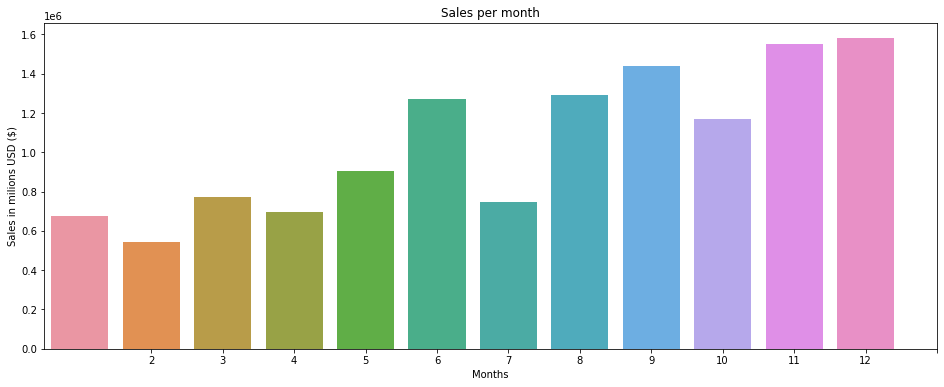

In [69]:
#plotando gráfico de somatorio de  vendas por mes
plt.figure(figsize=(16, 6))
sb.barplot(x = "Order_month", y="Sales",data=df_sum_order_month)
plt.xticks(df_sum_order_month["Order_month"])
plt.ylabel("Sales in milions USD ($)")
plt.xlabel("Months")
plt.title("Sales per month")
#plt.grid()

Vemos que o maior número de vendas ocorre em setembro, novembro e dezembro numa crescente. Porém, em outubro, um mês entre os meses de melhor desempenho há uma queda considerável nas vendas. Vemos também que os meses de Janeiro,Fevereiro e Março são os piores no ano.

Sugestão:

Para uma estratégia de maximização dos lucros nos meses de maior venda pode-se investir em campanhas de marketing mais agressivas com foco em vendas, principalmente no mes de outubro sabendo do potencial de lucro desta época do ano.

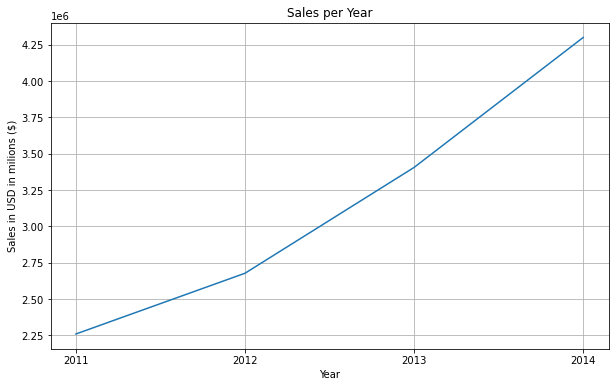

In [73]:
#plotando gráfico de somatorio de vendas por ano
plt.figure(figsize=(10, 6))
sb.lineplot(x = "Order_Year", y="Sales",data=df_sum_order_Year)
plt.ylabel("Sales in USD in milions ($)")
plt.xlabel("Year")
plt.title("Sales per Year")
plt.grid()

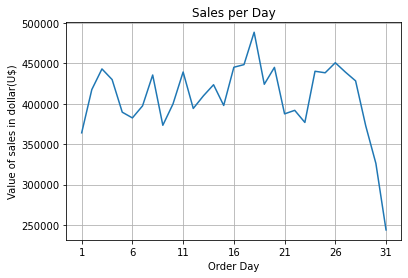

In [93]:
#plotando grafico de vendas por dia

field = "Order_day"
day_order = ["1","2","3","4","5","6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22","23","24","25","26","27","28","29","30","31"]
ax = df_sum_order_day.set_index(field).loc[day_order].plot(kind="line",legend=False)


ax.set_ylabel("Value of sales in dollar(U$)")
ax.set_xlabel("Order Day")
plt.title("Sales per Day")
plt.grid()

Após esses 3 gráficos podemos responder a questão de qual época do ano vende mais. As vendas estão numa crescente desde 2011 a 2014, os melhores meses de venda são setembro,novembro e dezembro e os melhores dias para venda são entre os dias 16 e 18.

### 4.2 Qual a região de mercado que mais compra?

In [94]:
#definindo variavel com dados de Market e Sales
df_sum_Market = df.groupby(["Market"],as_index = False)["Sales"].sum()

Text(0.5, 1.0, 'Sales per Market Region')

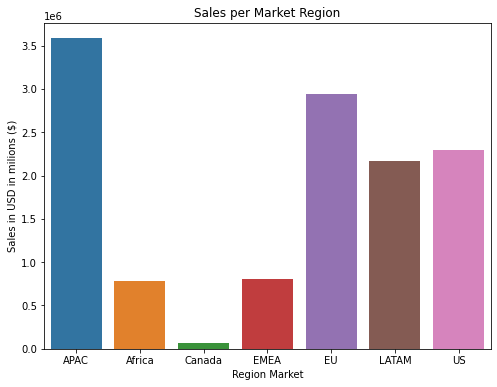

In [97]:
plt.figure(figsize=(8, 6))
sb.barplot(x = "Market", y="Sales",data=df_sum_Market)
plt.ylabel("Sales in USD in milions ($)")
plt.xlabel("Region Market")
plt.title("Sales per Market Region")

Com esse gráfico podemos responder a questão de qual região de mercado mais compra. Temos a APAC como a região líder e EU logo após. Com esse mesmo gráfico podemos concluir que canada africa e EMEA são regiões ainda pouco exploradas. Aplicar técnicas de marketing voltadas para captação de novos clientes nestas regiões é uma sugestão para aumentar o potencial de venda mundialmente.

### 4.3 O frete influencia no volume de compras?

In [99]:
df_sum_market_SHIP = df.groupby(["Market"],as_index = False)["Shipping Cost"].mean()

Text(0.5, 1.0, 'Shipping cost mean per Region Market')

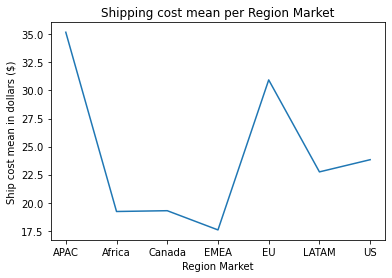

In [103]:
sb.lineplot(x = "Market", y="Shipping Cost",data=df_sum_market_SHIP)
plt.ylabel("Ship cost mean in dollars ($)")
plt.xlabel("Region Market")
plt.title("Shipping cost mean per Region Market")

Text(0.5, 0, 'Region Market')

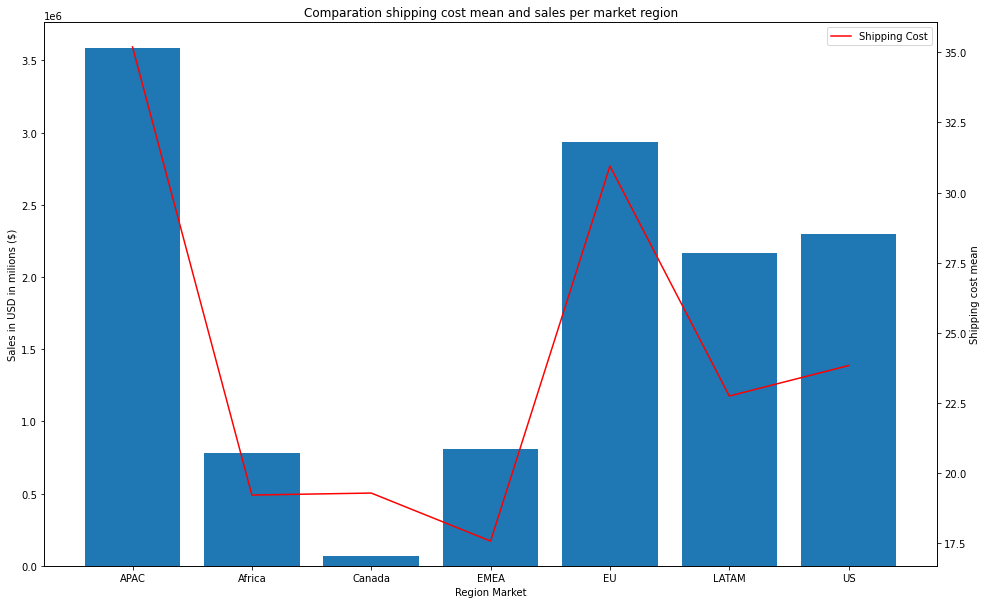

In [125]:
fig, ax = plt.subplots(figsize=(16,10))
ax.bar("Market","Sales", data=df_sum_Market)
ax2 = ax.twinx()

ax2.plot("Market", "Shipping Cost", data=df_sum_market_SHIP, color="red")
ax2.legend(loc=0)
plt.title("Comparation shipping cost mean and sales per market region")
ax2.set_ylabel("Shipping cost mean")
ax.set_ylabel("Sales in USD in milions ($)")
ax.set_xlabel("Region Market")

In [126]:
#calculando correlação entre shipping cost e sales
df["Sales"].corr(df["Shipping Cost"],method = "pearson")

0.7680728376889526

Supreendentemente vemos que as regiões de mercado com a média de custo de frete mais alta são as que mais compram e as com o valor de frete mais baixo as que menos compram.Existe uma alta correlação positiva entre valor médio de frete e número de vendas. Correlação não implica em causalidade e obviamente as regiões não compram mais por que o frete é mais caro. Porém, esse gráfico nos da uma informação importante. Regiões de mercado APAC e EU compram muito APESAR do frete alto.É possível que com promoções no valor de frete em determinadas épocas de venda alta a taxa de vendas aumentem nestas regiões. Já para as regiões de menor venda vemos que promoções relacionadas ao valor de frete ou entrega não devem surtir efeito.

### 4.3 Qual a país mais compra em cada Região de venda?

In [130]:
#definindo variavel com a soma de sales por pais e região de mercado
df_sum_Country = df.groupby(["Market","Country"],as_index = False)["Sales"].sum()

In [131]:
#definindo variaveis agrupadas em regiões por países
df_sum_Country_APAC = df_sum_Country.loc[df_sum_Country["Market"]== "APAC"]
df_sum_Country_Africa = df_sum_Country.loc[df_sum_Country["Market"]== "Africa"]
df_sum_Country_EMEA = df_sum_Country.loc[df_sum_Country["Market"]== "EMEA"]
df_sum_Country_LATAM = df_sum_Country.loc[df_sum_Country["Market"]== "LATAM"]
df_sum_Country_EU = df_sum_Country.loc[df_sum_Country["Market"]== "EU"]
df_sum_Country_US = df_sum_Country.loc[df_sum_Country["Market"]== "US"]
df_sum_Country_Canada = df_sum_Country.loc[df_sum_Country["Market"]== "Canada"]

In [134]:
#definindo essas variáveis do maior pro menor
df_sum_Country_APAC_sort = df_sum_Country_APAC.sort_values(by = "Sales", ascending = False)
df_sum_Country_Africa_sort = df_sum_Country_Africa.sort_values(by = "Sales", ascending = False)
df_sum_Country_EMEA_sort = df_sum_Country_EMEA.sort_values(by = "Sales", ascending = False)
df_sum_Country_LATAM_sort = df_sum_Country_LATAM.sort_values(by = "Sales", ascending = False)
df_sum_Country_EU_sort = df_sum_Country_EU.sort_values(by = "Sales", ascending = False)
df_sum_Country_US_sort = df_sum_Country_US.sort_values(by = "Sales", ascending = False)
df_sum_Country_Canada_sort = df_sum_Country_Canada.sort_values(by = "Sales", ascending = False)

In [135]:
#definindo as variáveis para apenas as 10 maiores
df_sum_Country_LATAM_sort = df_sum_Country_LATAM_sort.head(10)
df_sum_Country_APAC_sort = df_sum_Country_APAC_sort.head(10)
df_sum_Country_Africa_sort = df_sum_Country_Africa_sort.head(10)
df_sum_Country_EMEA_sort = df_sum_Country_EMEA_sort.head(10)
df_sum_Country_EU_sort = df_sum_Country_EU_sort.head(10)
df_sum_Country_US_sort = df_sum_Country_US_sort.head(10)
df_sum_Country_Canada_sort = df_sum_Country_Canada_sort.head(10)

In [136]:
#criando um dropdown com opções para cada região de mercado
drop_down = widgets.Dropdown(
            options=[('AFRICA'), ("EMEA"), ('LATAM'), ("APAC"), ("EU")],
            #value='2',
            description='Region:',
            disabled=False,
)


In [142]:
#redefinindo o nome de Democratic Republic of the Congo para D.R Congo para melhor visualização no gráfico
df_sum_Country_Africa_sort["Country"] = df_sum_Country_Africa_sort["Country"].str.replace("Democratic Republic of the Congo","D.R Congo", )

In [143]:
#criando uma função para gerar um gráfico para cada região de mercado a depender do valor escolhido no dropdown
def plot_region(region):
    
    
    if region == "AFRICA":
        region = df_sum_Country_Africa_sort
        gx = "AFRICA"
    elif region == "LATAM":
        region = df_sum_Country_LATAM_sort
        gx = "LATAM"
    elif region == "APAC":
        region = df_sum_Country_APAC_sort
        gx = "APAC"
    elif region == "EMEA":
        region = df_sum_Country_EMEA_sort
        gx = "EMEA"
    elif region == "EU":
        region = df_sum_Country_EU_sort
        gx = "EU"
    return (sb.barplot(x = "Country", y="Sales",data=region),plt.title("Ranking 10 best countries sales"),plt.ylabel("Sales in USD in milions ($)"),plt.xlabel("Country in " + gx + " market"),plt.xticks(rotation = "vertical"))
    #return (region.head())

widgets.interact(plot_region, region = drop_down)

interactive(children=(Dropdown(description='Region:', options=('AFRICA', 'EMEA', 'LATAM', 'APAC', 'EU'), value…

<function __main__.plot_region(region)>

Agora podemos ter uma visualização de ranking de vendas de países por região de mercado de forma simplificada respondendo a questão.
Retirei a visualização do US e do CANADA pelo fato de que essas regiões de mercado ja correspondem a apenas um país então todas as vendas desta região são de seu próprio país

### 4.4 Qual a país mais compra em cada Região de venda? Parte 2

Pensando numa visualização mais vou fazer um gráfico para responder a pergunta quanto as vendas dos melhores países impactam nas vendas totais da região correspondente.

In [145]:
#Definindo as variáveis como apenas o primeiro melhor país em vendas de cada região
df_sum_Country_LATAM_sort_best = df_sum_Country_LATAM_sort.head(1)
df_sum_Country_APAC_sort_best = df_sum_Country_APAC_sort.head(1)
df_sum_Country_Africa_sort_best = df_sum_Country_Africa_sort.head(1)
df_sum_Country_EMEA_sort_best = df_sum_Country_EMEA_sort.head(1)
df_sum_Country_EU_sort_best = df_sum_Country_EU_sort.head(1)
df_sum_Country_US_sort_best = df_sum_Country_US_sort.round().head(1)
df_sum_Country_Canada_sort_best = df_sum_Country_Canada_sort.head(1)

In [146]:
#Concatenando todas as variáveis anteriores em um unico df
best_country_per_region = pd.concat([df_sum_Country_LATAM_sort_best, df_sum_Country_APAC_sort_best,df_sum_Country_Africa_sort_best,df_sum_Country_EMEA_sort_best,df_sum_Country_EU_sort_best,df_sum_Country_US_sort_best,df_sum_Country_Canada_sort_best])

In [147]:
best_country_per_region.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 140 to 68
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Market   7 non-null      object 
 1   Country  7 non-null      object 
 2   Sales    7 non-null      float64
dtypes: float64(1), object(2)
memory usage: 224.0+ bytes


In [151]:
#concatenando a região de mercado e o país para melhorar a identificação no gráfico
best_country_per_region["Country_Market"] = best_country_per_region["Country"] +" " + "(" + best_country_per_region["Market"] + ")"

In [152]:
# retirando as regiões US e Canada coforme explicado anteriormente
best_country_per_region = best_country_per_region.drop(best_country_per_region.loc[best_country_per_region["Country"] == "United States"].index)
best_country_per_region = best_country_per_region.drop(best_country_per_region.loc[best_country_per_region["Country"] == "Canada"].index)

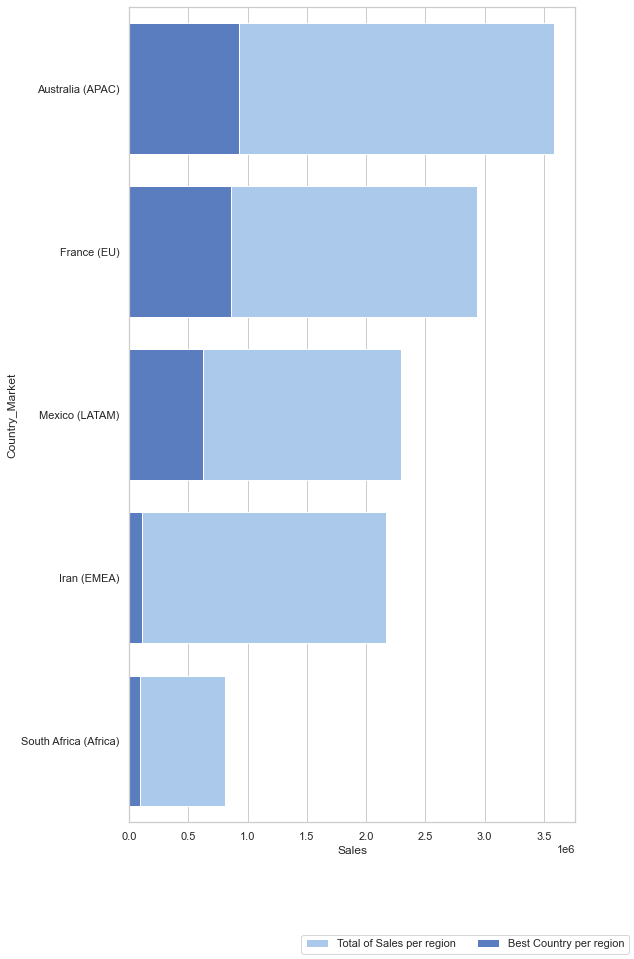

In [154]:
#Gerando o gráfico 
sb.set_theme(style="whitegrid")
f, ax = plt.subplots(figsize=(8, 15))



sb.set_color_codes("pastel"),sb.barplot(x="Sales", y="Market", data=df_sum_Market.sort_values(by = "Sales",ascending = False),label="Total of Sales per region", color="b")


#sb.barplot(x="Sales", y="Region", ax=ax2, legend=False, color="r")

sb.set_color_codes("muted")
sb.barplot(x="Sales", y="Country_Market", data=best_country_per_region.sort_values(by = "Sales",ascending = False),
            label="Best Country per region", color="b")
#ax.legend(ncol=2, loc="lower right", frameon=True)
# ax.set(xlabel="Total Sales per region",ylabel = "Best Country Sales")
# sb.despine(left=True, bottom=True)

ax.figure.legend(ncol=2, loc="lower right", frameon=True)

Agora podemos ver mais claramente quanto cada país top 1 de vendas representa no total de vendas de cada região de mercado

### 4.5 Ranking dos melhores clientes

In [177]:
#Definindo a variavel agrupada por ID dos clientes com a média de sales nos dando a informação do ticket médio
df_sum_custormer_sort = df.groupby(["Customer ID"],as_index = False)["Sales"].mean().sort_values(by = "Sales", ascending = False)

In [178]:
#mantendo apenas o top 10
df_sum_custormer_sort = df_sum_custormer_sort.head(10)

In [179]:
#Criando uma função para trazer o nome do cliente pelo ID
def name_customer(x):
    costumer_id = df.loc[df["Customer ID"] == x]["Customer Name"].reset_index()
    costumer_name = costumer_id.iloc[1]["Customer Name"]
    return(costumer_name)

In [180]:
#testando
name_customer("BW-1065")

'Barry Weirich'

In [181]:
#criando uma lista de nomes a partir do costumer ID
names = df_sum_custormer_sort["Customer ID"].apply(lambda x: name_customer(x) )

In [182]:
names.head(15)

234         Barry Weirich
1405          Sean Miller
420             Don Jones
1018      Mike Gockenbach
656          Hunter Lopez
661     Henry MacAllister
1489         Tamara Chand
995     Michael Dominguez
23                Amy Cox
1463         Tom Ashbrook
Name: Customer ID, dtype: object

In [183]:
#criando uma coluna com o nome do cliente
df_sum_custormer_sort["Customer Name"] = names

In [184]:
df_sum_custormer_sort.head(11)

,Customer ID,Sales,Customer Name
234,BW-1065,902.748000,Barry Weirich
1405,SM-20320,798.084486,Sean Miller
420,DJ-3510,664.076667,Don Jones
1018,MG-8145,653.639250,Mike Gockenbach
656,HL-15040,631.153842,Hunter Lopez
661,HM-4980,629.899714,Henry MacAllister
1489,TC-20980,579.970661,Tamara Chand
995,MD-7860,571.126000,Michael Dominguez
23,AC-10450,556.082428,Amy Cox
1463,TA-21385,548.740320,Tom Ashbrook


Text(0.5, 1.0, 'Ranking top 10 clientes (Ticket Médio)')

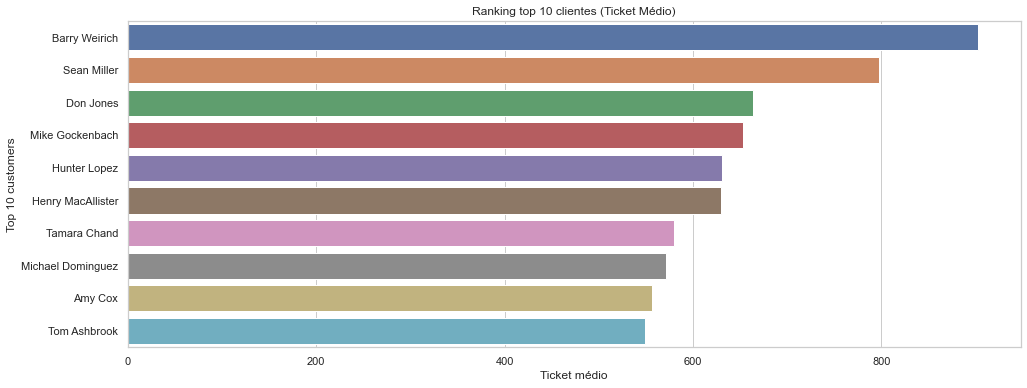

In [198]:
#Plotando o gráfico de top 10 costumers por ticket médio
plt.figure(figsize=(16, 6))
sb.barplot(x = "Sales", y="Customer Name",data=df_sum_custormer_sort, order = df_sum_custormer_sort.sort_values("Sales", ascending = False)["Customer Name"])
plt.ylabel("Top 10 customers")
plt.xlabel("Ticket médio")
plt.title("Ranking top 10 clientes (Ticket Médio)")

Temos agora o top 10 clientes por ticket médio

In [187]:
#vamos fazer agora uma variável com a contagem de compras feitas por cliente
df_sum_customer_sum = df.groupby(["Customer ID"],as_index = False)["Sales"].count()
df_sum_custormer_sort_sum = df_sum_customer_sum.sort_values(by = "Sales", ascending = False).reset_index()

In [188]:
#setando o top 10
df_sum_custormer_sort_sum = df_sum_custormer_sort_sum.head(10)

In [191]:
#colocando os nomes dos clientes pelo ID
df_sum_custormer_sort_sum["Customer Name"] = df_sum_custormer_sort_sum["Customer ID"].apply(lambda x: name_customer(x) )
df_sum_custormer_sort_sum.head(50)

,index,Customer ID,Sales,Customer Name
0,1206,PO-18850,97,Patrick O'Brill
1,150,BE-11335,94,Bill Eplett
2,733,JG-15805,90,John Grady
3,1459,SW-20755,89,Steven Ward
4,538,EM-13960,85,Eric Murdock
5,1099,MY-18295,85,Muhammed Yedwab
6,1587,ZC-21910,84,Zuschuss Carroll
7,1067,MP-17965,84,Michael Paige
8,294,CK-12205,83,Chloris Kastensmidt
9,32,AF-10870,81,Art Ferguson


Text(0.5, 1.0, 'Ranking top 10 clientes (total de compras)')

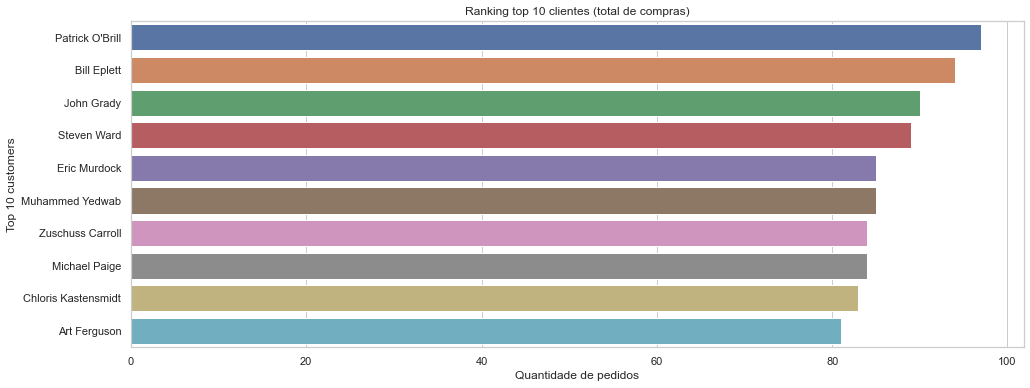

In [199]:
plt.figure(figsize=(16, 6))
sb.barplot(x = "Sales", y="Customer Name",data=df_sum_custormer_sort_sum, order = df_sum_custormer_sort_sum.sort_values("Sales", ascending = False)["Customer Name"])
plt.ylabel("Top 10 customers")
plt.xlabel("Quantidade de pedidos")
plt.title("Ranking top 10 clientes (total de compras)")

Agora temos o ranking de top 10 clientes que mais fazem pedidos

In [194]:
#agora vamos fazer o top 10 clientes em relação ao valor total comprado
df_sum_customer_sum2 = df.groupby(["Customer ID"],as_index = False)["Sales"].sum()
df_sum_custormer_sort_sum2 = df_sum_customer_sum2.sort_values(by = "Sales", ascending = False).reset_index()

In [195]:
df_sum_custormer_sort_sum2 = df_sum_custormer_sort_sum2.head(10)

In [196]:
df_sum_custormer_sort_sum2["Customer Name"] = df_sum_custormer_sort_sum2["Customer ID"].apply(lambda x: name_customer(x) )

Text(0.5, 1.0, 'Ranking top 10 clientes (total em dólar)')

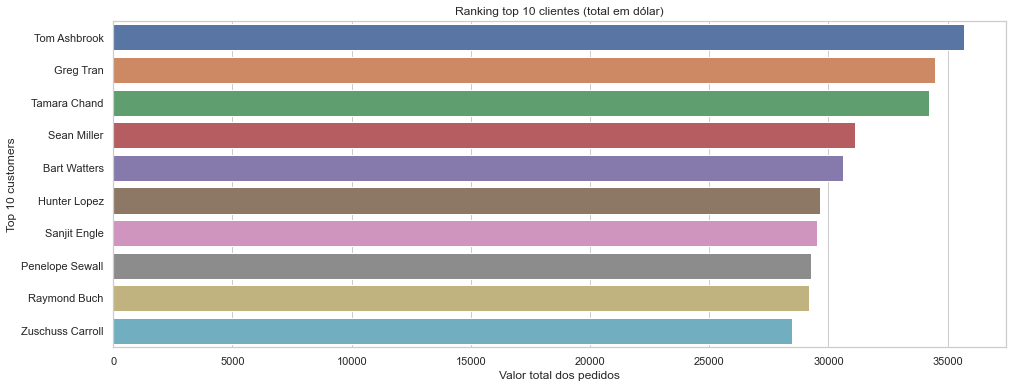

In [200]:
plt.figure(figsize=(16, 6))
sb.barplot(x = "Sales", y="Customer Name",data=df_sum_custormer_sort_sum2, order = df_sum_custormer_sort_sum2.sort_values("Sales", ascending = False)["Customer Name"])
plt.ylabel("Top 10 customers")
plt.xlabel("Valor total dos pedidos")
plt.title("Ranking top 10 clientes (total em dólar)")

Agora temos o top 10 clientes em ticket médio, número de compras e valor total